In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
!pip -q install yellowbrick

In [24]:
# Este código tem como objetivo estruturar meus conhecimentos em Machine Learning
# Abordo os principais temas

# Limpeza e tratamento de Dados
# Pré Processamento de Dados
# Aprendizagem Bayesiana
# Regressão Logística
# Árvores de Decisão

# Todos esses modeloes de ML são aplicados em uma base real de Produtos Estruturados tendo como objetivo dar uma experiência mais precisa

In [25]:
base_pe = pd.read_excel(r'C:\Users\gabri\OneDrive - XP Investimentos\Settima - BI\Python Scripts\7. Análise de Dados\Bases\base_estruturas.xlsx')
base_pe.set_index('Cliente', inplace=True)

In [26]:
x_estruturas = base_pe.iloc[:, 0:15].values
y_estruturas = base_pe.iloc[:, 16].values


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label_encoder_profissao = LabelEncoder()
label_encoder_sexo = LabelEncoder()
label_encoder_segmento = LabelEncoder()
label_encoder_perfil = LabelEncoder()
label_encoder_saporte = LabelEncoder()
label_encoder_idade = LabelEncoder()
label_encoder_status = LabelEncoder()
label_encoder_bolsa = LabelEncoder()
label_encoder_afd = LabelEncoder()
label_encoder_capLiqui = LabelEncoder()
label_encoder_netM1 = LabelEncoder()
label_encoder_netM = LabelEncoder()
label_encoder_fii = LabelEncoder()
label_encoder_rv = LabelEncoder()
label_encoder_financeiro = LabelEncoder()

In [29]:
x_estruturas[:, 0] = label_encoder_profissao.fit_transform(x_estruturas[:, 0])
x_estruturas[:, 1] = label_encoder_sexo.fit_transform(x_estruturas[:, 1])
x_estruturas[:, 2] = label_encoder_segmento.fit_transform(x_estruturas[:, 2])
x_estruturas[:, 3] = label_encoder_perfil.fit_transform(x_estruturas[:, 3])
x_estruturas[:, 4] = label_encoder_saporte.fit_transform(x_estruturas[:, 4])
x_estruturas[:, 5] = label_encoder_idade.fit_transform(x_estruturas[:, 5])
x_estruturas[:, 6] = label_encoder_status.fit_transform(x_estruturas[:, 6])
x_estruturas[:, 7] = label_encoder_bolsa.fit_transform(x_estruturas[:, 7])
x_estruturas[:, 8] = label_encoder_afd.fit_transform(x_estruturas[:, 8])
x_estruturas[:, 9] = label_encoder_capLiqui.fit_transform(x_estruturas[:, 9])
x_estruturas[:, 10] = label_encoder_netM1.fit_transform(x_estruturas[:, 10])
x_estruturas[:, 11] = label_encoder_netM.fit_transform(x_estruturas[:, 11])
x_estruturas[:, 12] = label_encoder_fii.fit_transform(x_estruturas[:, 12])
x_estruturas[:, 13] = label_encoder_rv.fit_transform(x_estruturas[:, 13])
x_estruturas[:, 14] = label_encoder_financeiro.fit_transform(x_estruturas[:, 14])

In [30]:
x_estruturas

array([[1, 1, 0, ..., 943, 2275, 822],
       [74, 1, 0, ..., 996, 2274, 1365],
       [75, 1, 0, ..., 1011, 2273, 1092],
       ...,
       [39, 1, 0, ..., 0, 1, 78],
       [82, 1, 0, ..., 0, 0, 25],
       [7, 1, 0, ..., 0, 0, 113]], dtype=object)

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [32]:
from sklearn.preprocessing import StandardScaler
scaler_estruturas = StandardScaler()
x_estruturas = scaler_estruturas.fit_transform(x_estruturas)
x_estruturas

array([[-1.4040642 ,  0.64195651, -0.55758313, ...,  2.30889279,
         1.7772591 , -0.21656789],
       [ 0.7298589 ,  0.64195651, -0.55758313, ...,  2.47756734,
         1.77573194,  0.59965602],
       [ 0.75909072,  0.64195651, -0.55758313, ...,  2.52530542,
         1.77420479,  0.1892893 ],
       ...,
       [-0.29325492,  0.64195651, -0.55758313, ..., -0.69224125,
        -1.69549179, -1.33492994],
       [ 0.96371348,  0.64195651, -0.55758313, ..., -0.69224125,
        -1.69701895, -1.4145982 ],
       [-1.22867326,  0.64195651, -0.55758313, ..., -0.69224125,
        -1.69701895, -1.28231882]])

In [33]:
from sklearn.model_selection import train_test_split
x_estruturas_treining, x_estruturas_testing, y_estruturas_treining, y_estruturas_testing = train_test_split(x_estruturas, y_estruturas, test_size=0.15, random_state=0)

In [34]:
import pickle
with open('estruturas.pkl', mode = 'wb') as f:
    pickle.dump([x_estruturas_treining, y_estruturas_treining, x_estruturas_testing, y_estruturas_testing], f)

In [35]:
import pandas as pd
import pickle
from sklearn.naive_bayes import GaussianNB

In [36]:
with open(r'C:\Users\gabri\OneDrive - XP Investimentos\Settima - BI\Python Scripts\7. Análise de Dados\Renda Variável\estruturas.pkl', 'rb') as f:
    x_estruturas_treining, y_estruturas_treining, x_estruturas_testing, y_estruturas_testing = pickle.load(f)
    
    
x_estruturas_treining.shape, y_estruturas_treining.shape, x_estruturas_testing.shape, y_estruturas_testing.shape

((2042, 16), (2042,), (361, 16), (361,))

In [37]:
naive_estrutura_data = GaussianNB()
naive_estrutura_data.fit(x_estruturas_treining, y_estruturas_treining)
previsoes = naive_estrutura_data.predict(x_estruturas_testing)
previsoes.shape, y_estruturas_testing.shape

((361,), (361,))

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_estruturas_testing, previsoes)

0.6398891966759003

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logistic_estrutura = LogisticRegression(random_state=1)
logistic_estrutura.fit(x_estruturas_treining, y_estruturas_treining)

LogisticRegression(random_state=1)

In [41]:
logistic_estrutura.intercept_

array([-0.65394599])

In [42]:
logistic_estrutura.coef_

array([[ 0.06219198, -0.11252974, -0.05642497, -0.31160442,  0.07449824,
        -0.22564725, -0.0065238 ,  0.        ,  0.4088645 , -0.23997347,
        -0.01046219,  0.20163772,  0.52669968, -0.3314238 ,  0.19632974,
         0.04591595]])

In [43]:
previsoes = logistic_estrutura.predict(x_estruturas_testing)
previsoes

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [44]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_estruturas_testing, previsoes)

0.6897506925207756

0.6897506925207756

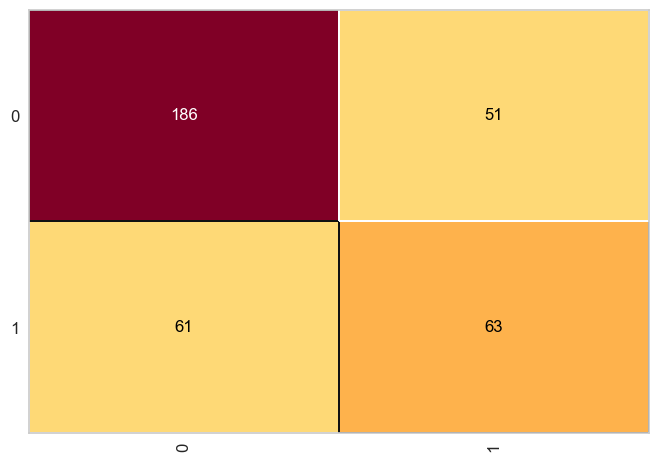

In [45]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_estrutura)
cm.fit(x_estruturas_treining, y_estruturas_treining)
cm.score(x_estruturas_testing, y_estruturas_testing)

In [46]:
print(classification_report(y_estruturas_testing, previsoes))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       237
           1       0.55      0.51      0.53       124

    accuracy                           0.69       361
   macro avg       0.65      0.65      0.65       361
weighted avg       0.68      0.69      0.69       361



In [47]:
# Árvores de Decisão
from sklearn.tree import DecisionTreeClassifier



In [48]:
x_estruturas_treining.shape, y_estruturas_treining.shape
x_estruturas_testing.shape, y_estruturas_testing.shape

((361, 16), (361,))

In [49]:
arvore_estrutura = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_estrutura.fit(x_estruturas_treining, y_estruturas_treining)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
previsoes = arvore_estrutura.predict(x_estruturas_testing)
previsoes

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,

In [51]:
accuracy_score(y_estruturas_testing, previsoes)

0.590027700831025

0.590027700831025

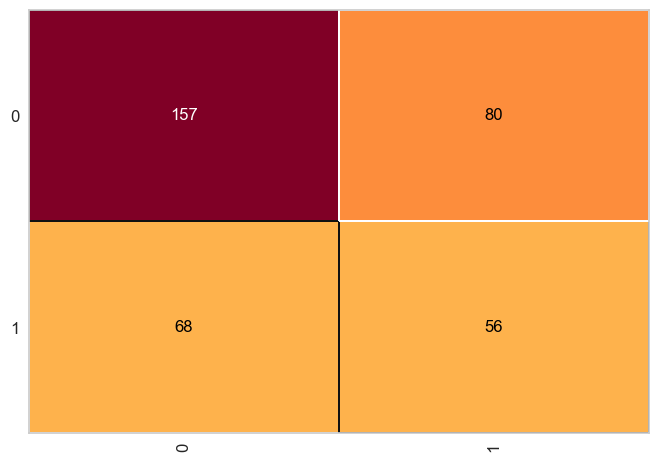

In [52]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_estrutura)
cm.fit(x_estruturas_treining, y_estruturas_treining)
cm.score(x_estruturas_testing, y_estruturas_testing)

In [53]:
print(classification_report(y_estruturas_testing, previsoes))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       237
           1       0.41      0.45      0.43       124

    accuracy                           0.59       361
   macro avg       0.55      0.56      0.56       361
weighted avg       0.60      0.59      0.59       361



In [54]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [55]:
random_forest_estrutura = RandomForestClassifier(n_estimators=50, criterion="entropy", random_state=0)
random_forest_estrutura.fit(x_estruturas_treining, y_estruturas_treining)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [56]:
previsoes = random_forest_estrutura.predict(x_estruturas_testing)
previsoes

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [57]:
accuracy_score(y_estruturas_testing, previsoes)

0.7202216066481995

0.7202216066481995

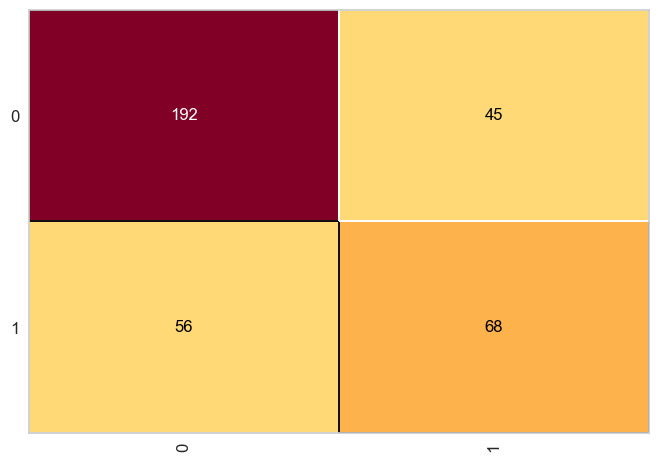

In [58]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_estrutura)
cm.fit(x_estruturas_treining, y_estruturas_treining)
cm.score(x_estruturas_testing, y_estruturas_testing)

In [59]:
# kNN
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn_estrutura = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_estrutura.fit(x_estruturas_treining, y_estruturas_treining)


KNeighborsClassifier()

In [61]:
previsoes = knn_estrutura.predict(x_estruturas_testing)
previsoes

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
y_estruturas_testing

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [63]:
accuracy_score(y_estruturas_testing, previsoes)

0.6620498614958449

0.6620498614958449

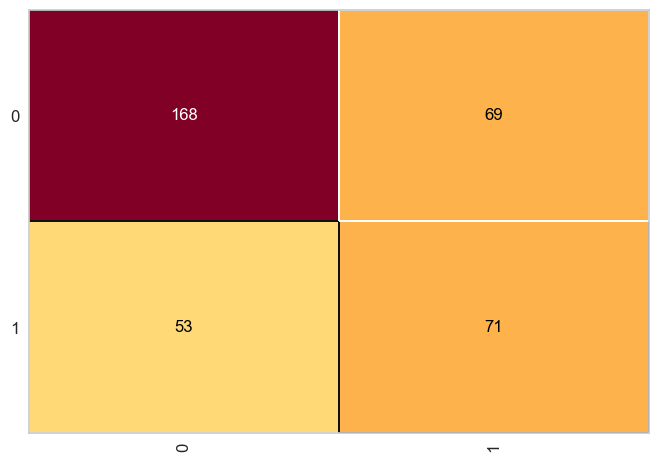

In [64]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_estrutura)
cm.fit(x_estruturas_treining, y_estruturas_treining)
cm.score(x_estruturas_testing, y_estruturas_testing)

In [65]:
from sklearn.svm import SVC

In [66]:
svm_estrutura = SVC(kernel='linear', random_state=1, C=10.0)
svm_estrutura.fit(x_estruturas_treining, y_estruturas_treining)

SVC(C=10.0, kernel='linear', random_state=1)

In [67]:
previsoes = svm_estrutura.predict(x_estruturas_testing)
previsoes

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [68]:
accuracy_score(y_estruturas_testing, previsoes)

0.6869806094182825

In [69]:
from sklearn.neural_network import MLPClassifier
rede_neural_estrutura = MLPClassifier(max_iter=1000, verbose=True, solver="adam", activation="relu", hidden_layer_sizes=(100, 100))
rede_neural_estrutura.fit(x_estruturas_treining, y_estruturas_treining)

Iteration 1, loss = 0.63206406
Iteration 2, loss = 0.57059885
Iteration 3, loss = 0.55414360
Iteration 4, loss = 0.54392357
Iteration 5, loss = 0.53715076
Iteration 6, loss = 0.53180322
Iteration 7, loss = 0.52671523
Iteration 8, loss = 0.52330496
Iteration 9, loss = 0.51956544
Iteration 10, loss = 0.51458446
Iteration 11, loss = 0.51156681
Iteration 12, loss = 0.50739198
Iteration 13, loss = 0.50426788
Iteration 14, loss = 0.50110762
Iteration 15, loss = 0.49807240
Iteration 16, loss = 0.49675066
Iteration 17, loss = 0.49149322
Iteration 18, loss = 0.48881137
Iteration 19, loss = 0.48518083
Iteration 20, loss = 0.48326474
Iteration 21, loss = 0.47889124
Iteration 22, loss = 0.47578777
Iteration 23, loss = 0.47193298
Iteration 24, loss = 0.46760817
Iteration 25, loss = 0.46479039
Iteration 26, loss = 0.46476410
Iteration 27, loss = 0.46061709
Iteration 28, loss = 0.45594318
Iteration 29, loss = 0.45342478
Iteration 30, loss = 0.45097657
Iteration 31, loss = 0.44956396
Iteration 32, los

Iteration 263, loss = 0.05105526
Iteration 264, loss = 0.05118552
Iteration 265, loss = 0.05316740
Iteration 266, loss = 0.05080981
Iteration 267, loss = 0.04865926
Iteration 268, loss = 0.04963585
Iteration 269, loss = 0.05302135
Iteration 270, loss = 0.04961586
Iteration 271, loss = 0.04827592
Iteration 272, loss = 0.04734919
Iteration 273, loss = 0.04787170
Iteration 274, loss = 0.04597910
Iteration 275, loss = 0.04623972
Iteration 276, loss = 0.04415700
Iteration 277, loss = 0.04882601
Iteration 278, loss = 0.04396785
Iteration 279, loss = 0.04373560
Iteration 280, loss = 0.04236141
Iteration 281, loss = 0.04276556
Iteration 282, loss = 0.04194443
Iteration 283, loss = 0.04516351
Iteration 284, loss = 0.04555171
Iteration 285, loss = 0.04400660
Iteration 286, loss = 0.04363233
Iteration 287, loss = 0.04241271
Iteration 288, loss = 0.03905682
Iteration 289, loss = 0.04232623
Iteration 290, loss = 0.04027916
Iteration 291, loss = 0.04411770
Iteration 292, loss = 0.04123027
Iteration 

Iteration 514, loss = 0.00576787
Iteration 515, loss = 0.00546276
Iteration 516, loss = 0.00620683
Iteration 517, loss = 0.00612951
Iteration 518, loss = 0.00607775
Iteration 519, loss = 0.00593633
Iteration 520, loss = 0.00650458
Iteration 521, loss = 0.00627000
Iteration 522, loss = 0.00908684
Iteration 523, loss = 0.00874292
Iteration 524, loss = 0.00732925
Iteration 525, loss = 0.00651957
Iteration 526, loss = 0.00594348
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)

In [70]:
previsoes = rede_neural_estrutura.predict(x_estruturas_testing)
accuracy_score(y_estruturas_testing, previsoes)

0.6398891966759003